## Random Forest

In [4]:
library(randomForest)

mod.rf <- randomForest(factor(am) ~. , data=mtcars)
summary(mod.rf)

                Length Class  Mode     
call               3   -none- call     
type               1   -none- character
predicted         32   factor numeric  
err.rate        1500   -none- numeric  
confusion          6   -none- numeric  
votes             64   matrix numeric  
oob.times         32   -none- numeric  
classes            2   -none- character
importance        10   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y                 32   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [6]:
table(pred=mod.rf$predicted, obs=mtcars$am)

    obs
pred  0  1
   0 17  2
   1  2 11

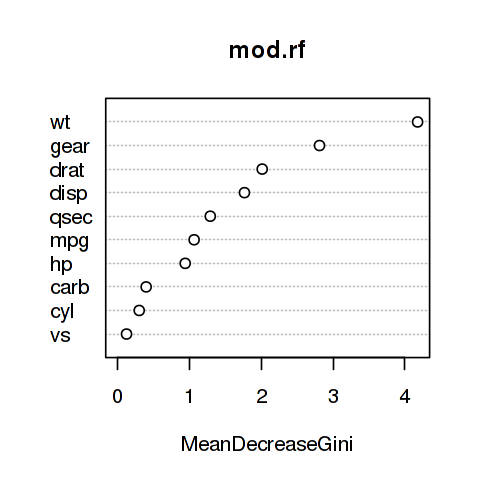

In [9]:
options(repr.plot.width = 4, repr.plot.height = 4)
varImpPlot(mod.rf)

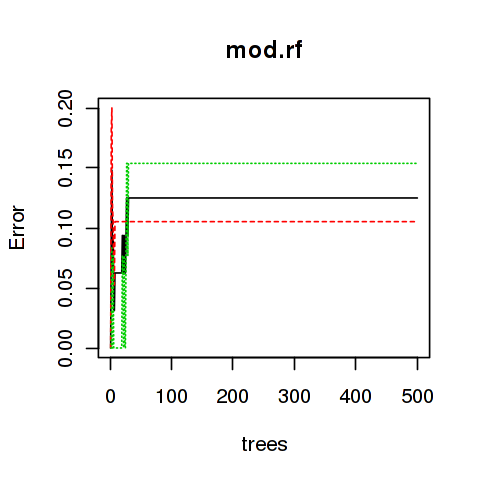

In [10]:
plot(mod.rf)

In [12]:
getTree(mod.rf)

,left daughter,right daughter,split var,split point,status,prediction
1,2,3,9,3.500,1,0
2,0,0,0,0.000,-1,1
3,4,5,1,19.450,1,0
4,6,7,4,229.000,1,0
5,8,9,6,2.985,1,0
6,0,0,0,0.000,-1,1
7,0,0,0,0.000,-1,2
8,0,0,0,0.000,-1,2
9,0,0,0,0.000,-1,1


## Ada Boost

In [58]:
if(!require(fastAdaboost)) install.packages("fastAdaboost"); require(fastAdaboost)

In [61]:
mod.ada <- adaboost(am ~. ,data=mtcars,nIter = 15)

In [64]:
get_tree(mod.ada,tree_num = 1)

$`0`
n= 32 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 32 0.40625 0 (0.68113208 0.31886792)  
  2) wt>=3.18 18 0.03125 0 (0.96130952 0.03869048) *
  3) wt< 3.18 14 0.06250 1 (0.19587629 0.80412371) *


In [66]:
get_tree(mod.ada,tree_num = 5)

$`4`
n= 32 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 32 0.4075900 0 (0.6787154 0.3212846)  
  2) gear< 3.5 15 0.0000000 0 (1.0000000 0.0000000) *
  3) gear>=3.5 17 0.2087146 1 (0.4266930 0.5733070) *


In [70]:
pred <- predict(mod.ada, newdata=mtcars,type="class")
table(pred=pred$class,observ=mtcars$am)

    observ
pred  0  1
   0 19  0
   1  0 13

## XGBoost

In [14]:
if(!require(xgboost)) install.packages("xgboost")


Installing package into ‘/home/tomas/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [26]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [27]:
vn <- c("mpg","cyl","disp","hp","drat","wt","qsec","vs","gear","carb")

In [30]:
data <- as.matrix(mtcars[,vn])

mod.xgb <- xgboost(data = data, label = mtcars$am, max_depth = 2, eta = 1,
nrounds = 15, objective = "binary:logistic")


[1]	train-error:0.093750 
[2]	train-error:0.031250 
[3]	train-error:0.031250 
[4]	train-error:0.062500 
[5]	train-error:0.031250 
[6]	train-error:0.062500 
[7]	train-error:0.031250 
[8]	train-error:0.062500 
[9]	train-error:0.031250 
[10]	train-error:0.031250 
[11]	train-error:0.031250 
[12]	train-error:0.031250 
[13]	train-error:0.031250 
[14]	train-error:0.031250 
[15]	train-error:0.031250 


In [34]:
pred <- predict(mod.xgb, newdata=as.matrix(mtcars[,vn]))
pred.cat <- ifelse(pred>=0.5,1,0)
table(pred=pred.cat, observ=mtcars$am)

    observ
pred  0  1
   0 19  1
   1  0 12

In [35]:
xgb.dump(mod.xgb)

[1] "booster[0]"                            
 [2] "0:[f5<3.18000007] yes=1,no=2,missing=1"
 [3] "1:[f6<19.1849995] yes=3,no=4,missing=3"
 [4] "3:leaf=1.42857146"                     
 [5] "4:leaf=-0"                             
 [6] "2:leaf=-1.4545455"                     
 [7] "booster[1]"                            
 [8] "0:[f8<3.5] yes=1,no=2,missing=1"       
 [9] "1:leaf=-0.926938891"                   
[10] "2:[f5<3.01250005] yes=3,no=4,missing=3"
[11] "3:leaf=0.943640471"                    
[12] "4:leaf=-0.0316318758"                  
[13] "booster[2]"                            
[14] "0:[f8<3.5] yes=1,no=2,missing=1"       
[15] "1:leaf=-0.641755164"                   
[16] "2:[f6<18.7550011] yes=3,no=4,missing=3"
[17] "3:leaf=0.725384355"                    
[18] "4:leaf=-0.106010132"                   
[19] "booster[3]"                            
[20] "0:[f5<3.18000007] yes=1,no=2,missing=1"
[21] "1:leaf=0.22051464"                     
[22] "2:leaf=-0.267532051"                   
[23] "booster[4]"                            
[24] "0:[f6<18.7550011] yes=1,no=2,missing=1"
[25] "1:leaf=0.190326646"                    
[26] "2:leaf=-0.219452128"                   
[27] "booster[5]"                            
[28] "0:[f5<3.18000007] yes=1,no=2,missing=1"
[29] "1:leaf=0.166589245"                    
[30] "2:leaf=-0.184907615"                   
[31] "booster[6]"                            
[32] "0:[f6<18.7550011] yes=1,no=2,missing=1"
[33] "1:leaf=0.145227596"                    
[34] "2:leaf=-0.155526996"                   
[35] "booster[7]"                            
[36] "0:[f5<3.18000007] yes=1,no=2,missing=1"
[37] "1:leaf=0.130237818"                    
[38] "2:leaf=-0.139298081"                   
[39] "booster[8]"                            
[40] "0:[f6<18.7550011] yes=1,no=2,missing=1"
[41] "1:leaf=0.116245776"                    
[42] "2:leaf=-0.120393269"                   
[43] "booster[9]"                            
[44] "0:[f5<3.18000007] yes=1,no=2,missing=1"
[45] "1:leaf=0.10557913"                     
[46] "2:leaf=-0.11103259"                    
[47] "booster[10]"                           
[48] "0:leaf=-0.00276780478"                 
[49] "booster[11]"                           
[50] "0:leaf=-0.000927052286"                
[51] "booster[12]"                           
[52] "0:leaf=-0.000310270232"                
[53] "booster[13]"                           
[54] "0:leaf=-0.000104007035"                
[55] "booster[14]"                           
[56] "0:leaf=-3.50135269e-05"

XGBoost has its own data type called DMatrix. This is a matrix with special characteristics and is optimized for running with large datasets. We will need to enter the train dataset into this data type as a matrix for the data (without the lables) and the labels separatelly as a vector.

In [53]:
data <- xgb.DMatrix(as.matrix(mtcars[,vn]), label = mtcars$am)
str(data)

Class 'xgb.DMatrix' <externalptr> 
 - attr(*, ".Dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:10] "mpg" "cyl" "disp" "hp" ...


In [54]:
mod.xgb <- xgboost(data,  max_depth = 2, eta = 1,
nrounds = 15, objective = "binary:logistic")

[1]	train-error:0.093750 
[2]	train-error:0.031250 
[3]	train-error:0.031250 
[4]	train-error:0.062500 
[5]	train-error:0.031250 
[6]	train-error:0.062500 
[7]	train-error:0.031250 
[8]	train-error:0.062500 
[9]	train-error:0.031250 
[10]	train-error:0.031250 
[11]	train-error:0.031250 
[12]	train-error:0.031250 
[13]	train-error:0.031250 
[14]	train-error:0.031250 
[15]	train-error:0.031250 
